<a href="https://colab.research.google.com/github/surendarmanoj/data-science/blob/main/bagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [40]:
df = pd.read_csv('Iris.csv')

In [41]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [42]:
df = df.iloc[:,1:]

In [43]:
df.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [44]:
encoder = LabelEncoder()

# verginica - 0, setosa - 1, versicolar - 2

In [45]:
df['Species'] = encoder.fit_transform(df['Species'])

In [46]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
df = df[df['Species'] != 0][['SepalWidthCm','PetalLengthCm','Species']]
df.head()


,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


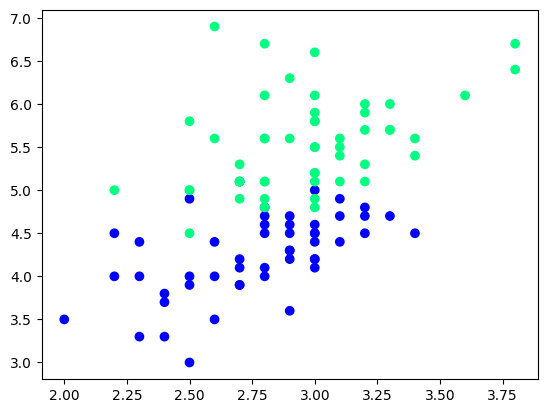

In [11]:
plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'],c=df['Species'],cmap='winter')


In [48]:
df_train = df.iloc[:60,:].sample(10)
df_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
5,5.4,3.9,1.7,0.4,0
11,4.8,3.4,1.6,0.2,0
39,5.1,3.4,1.5,0.2,0
37,4.9,3.1,1.5,0.1,0
25,5.0,3.0,1.6,0.2,0
47,4.6,3.2,1.4,0.2,0
44,5.1,3.8,1.9,0.4,0
0,5.1,3.5,1.4,0.2,0
52,6.9,3.1,4.9,1.5,1
40,5.0,3.5,1.3,0.3,0


In [49]:
df.shape

(150, 5)

In [13]:
# Taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [50]:
df_train


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
5,5.4,3.9,1.7,0.4,0
11,4.8,3.4,1.6,0.2,0
39,5.1,3.4,1.5,0.2,0
37,4.9,3.1,1.5,0.1,0
25,5.0,3.0,1.6,0.2,0
47,4.6,3.2,1.4,0.2,0
44,5.1,3.8,1.9,0.4,0
0,5.1,3.5,1.4,0.2,0
52,6.9,3.1,4.9,1.5,1
40,5.0,3.5,1.3,0.3,0


In [51]:
df_val


,SepalWidthCm,PetalLengthCm,Species
70,3.2,4.8,1
115,3.2,5.3,2
111,2.7,5.3,2
144,3.3,5.7,2
91,3.0,4.6,1


In [52]:
df_test


,SepalWidthCm,PetalLengthCm,Species
126,2.8,4.8,2
118,2.6,6.9,2
93,2.3,3.3,1
130,2.8,6.1,2
100,3.3,6.0,2


In [17]:
# df_train = df.iloc[:60,:] -> rows
# X_test = df_val.iloc[:,0:2] -> column

# df = df[row,column, step]


X_test = df_val.iloc[:,:2].values
y_test = df_val.iloc[:,-1].values

In [18]:
y_test


array([1, 2, 2, 2, 1])

**Case 1 Bagging**

In [19]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
106,2.5,4.5,2
108,2.5,5.8,2
71,2.8,4.0,1
87,2.3,4.4,1
79,2.6,3.5,1
97,2.9,4.3,1
72,2.5,4.9,1
79,2.6,3.5,1


In [20]:
dt_bag1 = DecisionTreeClassifier()


In [21]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

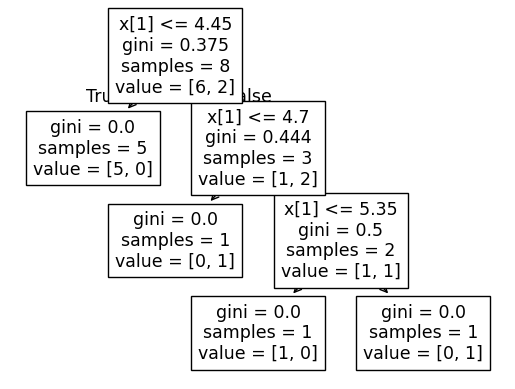

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.4


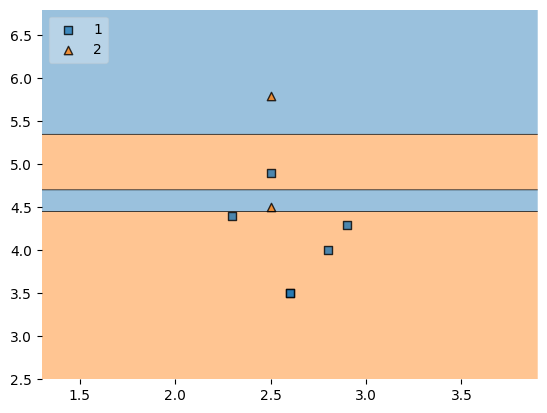

In [22]:
evaluate(dt_bag1,X,y)

In [23]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
139,3.1,5.4,2
97,2.9,4.3,1
89,2.5,4.0,1
108,2.5,5.8,2
106,2.5,4.5,2
72,2.5,4.9,1
106,2.5,4.5,2
72,2.5,4.9,1


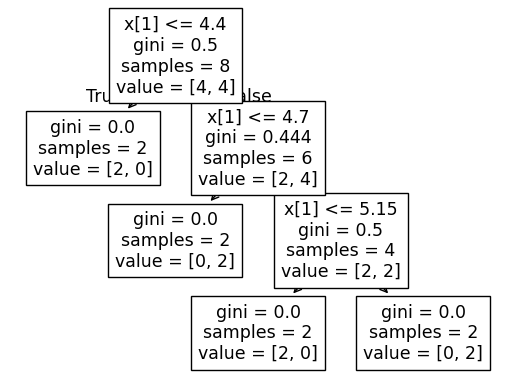

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


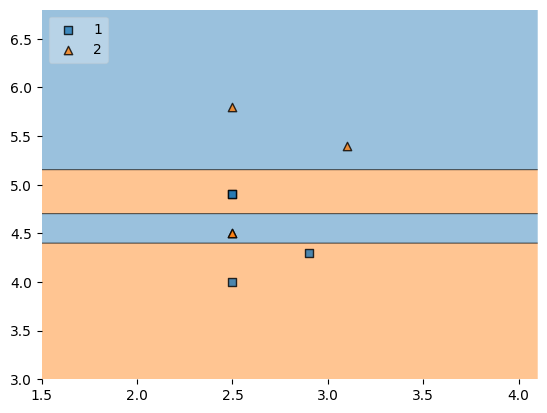

In [24]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [25]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
97,2.9,4.3,1
79,2.6,3.5,1
108,2.5,5.8,2
71,2.8,4.0,1
71,2.8,4.0,1
108,2.5,5.8,2
108,2.5,5.8,2
89,2.5,4.0,1


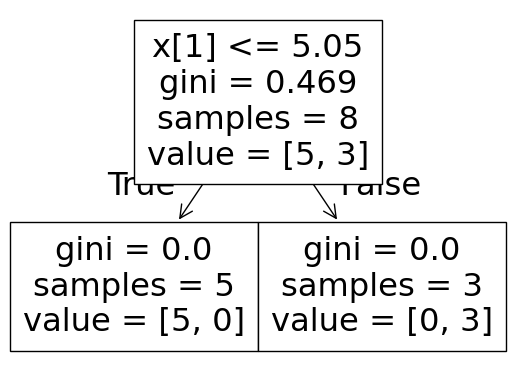

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


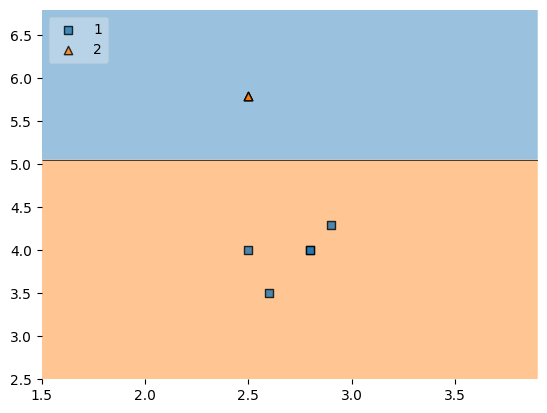

In [26]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

**Predict**

In [27]:
df_test


,SepalWidthCm,PetalLengthCm,Species
126,2.8,4.8,2
118,2.6,6.9,2
93,2.3,3.3,1
130,2.8,6.1,2
100,3.3,6.0,2


In [53]:
print("Predictor 1",dt_bag1.predict(np.array([3.2,4.5]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([3.2,4.5]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([3.2,4.5]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [2]
Predictor 3 [1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


**Pasting**

In [30]:
# Row sampling without replacement
df_train

,SepalWidthCm,PetalLengthCm,Species
97,2.9,4.3,1
84,3.0,4.5,1
71,2.8,4.0,1
108,2.5,5.8,2
106,2.5,4.5,2
79,2.6,3.5,1
139,3.1,5.4,2
72,2.5,4.9,1
89,2.5,4.0,1
87,2.3,4.4,1


In [31]:
df_train.sample(8)


,SepalWidthCm,PetalLengthCm,Species
89,2.5,4.0,1
87,2.3,4.4,1
72,2.5,4.9,1
108,2.5,5.8,2
71,2.8,4.0,1
139,3.1,5.4,2
97,2.9,4.3,1
106,2.5,4.5,2


**Random Subspaces**

In [33]:
df1 = pd.read_csv('Iris.csv')
df1 = df1.sample(10)

In [34]:
df1


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
93,94,5.0,2.3,3.3,1.0,Iris-versicolor
84,85,5.4,3.0,4.5,1.5,Iris-versicolor
92,93,5.8,2.6,4.0,1.2,Iris-versicolor
142,143,5.8,2.7,5.1,1.9,Iris-virginica
59,60,5.2,2.7,3.9,1.4,Iris-versicolor
109,110,7.2,3.6,6.1,2.5,Iris-virginica
42,43,4.4,3.2,1.3,0.2,Iris-setosa
99,100,5.7,2.8,4.1,1.3,Iris-versicolor
18,19,5.7,3.8,1.7,0.3,Iris-setosa
115,116,6.4,3.2,5.3,2.3,Iris-virginica


In [35]:
df1.sample(2,replace=True,axis=1)

,PetalWidthCm,PetalLengthCm
93,1.0,3.3
84,1.5,4.5
92,1.2,4.0
142,1.9,5.1
59,1.4,3.9
109,2.5,6.1
42,0.2,1.3
99,1.3,4.1
18,0.3,1.7
115,2.3,5.3


**Random Patches**

In [36]:
df1


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
93,94,5.0,2.3,3.3,1.0,Iris-versicolor
84,85,5.4,3.0,4.5,1.5,Iris-versicolor
92,93,5.8,2.6,4.0,1.2,Iris-versicolor
142,143,5.8,2.7,5.1,1.9,Iris-virginica
59,60,5.2,2.7,3.9,1.4,Iris-versicolor
109,110,7.2,3.6,6.1,2.5,Iris-virginica
42,43,4.4,3.2,1.3,0.2,Iris-setosa
99,100,5.7,2.8,4.1,1.3,Iris-versicolor
18,19,5.7,3.8,1.7,0.3,Iris-setosa
115,116,6.4,3.2,5.3,2.3,Iris-virginica


In [37]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)

,PetalLengthCm,PetalWidthCm
92,4.0,1.2
59,3.9,1.4
109,6.1,2.5
18,1.7,0.3
59,3.9,1.4
115,5.3,2.3
142,5.1,1.9
59,3.9,1.4
